In [1]:
# Marketing Analytics Portfolio Project

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots in Jupyter Notebook
%matplotlib inline

# Display plot styles
sns.set(style="whitegrid")


In [2]:
# Define the file path to your Excel file
file_path = r"X:\GIT\Portfolio_Projects\Marketing Analytics\Data\ifood_df.csv"

# Read the Excel file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
# Check the dimensions of the data and its information
print("Dataset shape:", df.shape)
df.info()

# Descriptive statistics to understand numeric features
df.describe()

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If necessary, handle missing values, e.g., fill with mean or drop rows/columns
# Example: fill missing numeric values with the column mean
df.fillna(df.mean(), inplace=True)

# Verify that missing values are addressed
print("Missing values after cleaning:\n", df.isnull().sum())


Dataset shape: (2205, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  


In [4]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [5]:
# Block 3: Data Cleaning and Preparation

# List of columns actually present in your dataset
required_columns = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
    'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced',
    'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
    'education_2n Cycle', 'education_Basic', 'education_Graduation',
    'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
    'AcceptedCmpOverall'
]

# If your dataset has extra columns, keep only these
df = df[required_columns]

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Example: fill numeric missing values with column mean (adjust as needed)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verify cleaning
print("\nAfter cleaning:")
df.info()
print(df.head())


Missing values per column:
 Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegular

In [7]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [13]:
# Focus on numeric columns
corr_cols = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 
    'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds'
]
X = df[corr_cols]
print('Inputs Dataframe shape   :', X.shape)
Y = df[["Response"]]
print('Outputs Dataframe shape   :', Y.shape)

Inputs Dataframe shape   : (2205, 19)
Outputs Dataframe shape   : (2205, 1)


In [14]:
Y

,Response
0,1
1,0
2,0
3,0
4,0
...,...
2200,0
2201,0
2202,0
2203,0


In [16]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std
print(Z)


        Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0     0.314579 -0.823218 -0.930556  0.310760  0.974345   1.548263   
1    -0.254820  1.038522  0.906396 -0.380514 -0.874578  -0.638520   
2     0.965135 -0.823218 -0.930556 -0.795278  0.355074   0.567981   
3    -1.205814  1.038522 -0.930556 -0.795278 -0.874578  -0.563113   
4     0.322063  1.038522 -0.930556  1.555052 -0.394569   0.417168   
...        ...       ...       ...       ...       ...        ...   
2200  0.463519 -0.823218  0.906396 -0.104005  1.193608   0.417168   
2201  0.598265  2.900262  0.906396  0.241632  0.295814  -0.663655   
2202  0.258721 -0.823218 -0.930556  1.451361  1.783248   0.542845   
2203  0.850811 -0.823218  0.906396 -1.417424  0.361000   0.090408   
2204  0.060199  1.038522  0.906396 -0.311387 -0.658278  -0.588249   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0            1.748003         2.448599          1.479965      0.849364   
1           -0.731512  

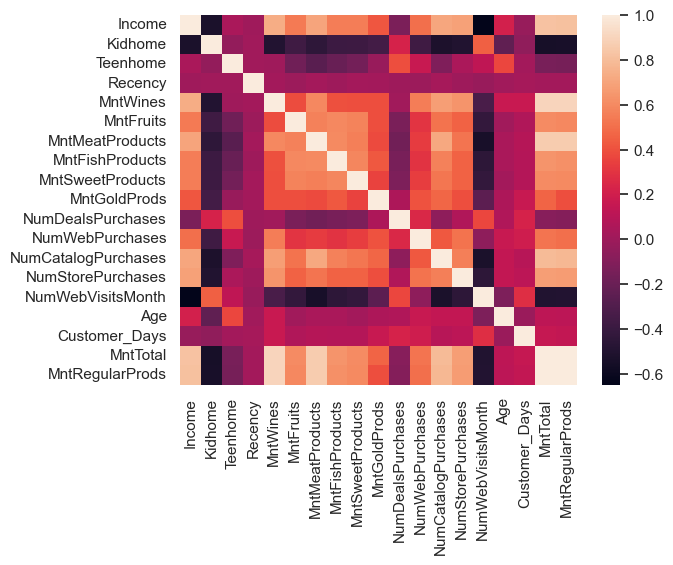

In [17]:
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()


In [18]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)


Eigen values:
 [ 8.17099898e+00  2.06486085e+00  1.44363998e+00  1.00695878e+00
  9.30629020e-01  8.38394408e-01  7.25884915e-01  1.42238388e-01
  6.10685065e-01  5.60194784e-01  2.23505667e-01  2.68616788e-01
  3.37222839e-01  3.87890677e-01  4.09342175e-01  4.46631603e-01
  4.32305080e-01 -4.83420635e-18  2.44545263e-16]
Eigen values Shape: (19,)
Eigen Vector Shape: (19, 19)


In [20]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var


array([0.43005258, 0.53872946, 0.61471052, 0.66770835, 0.71668882,
       0.76081484, 0.79901931, 0.80650554, 0.83864686, 0.8681308 ,
       0.87989425, 0.89403198, 0.91178055, 0.93219585, 0.95374017,
       0.9772471 , 1.        , 1.        , 1.        ])

In [46]:
n_components = np.argmax(explained_var >= 0.70) + 1
n_components


5

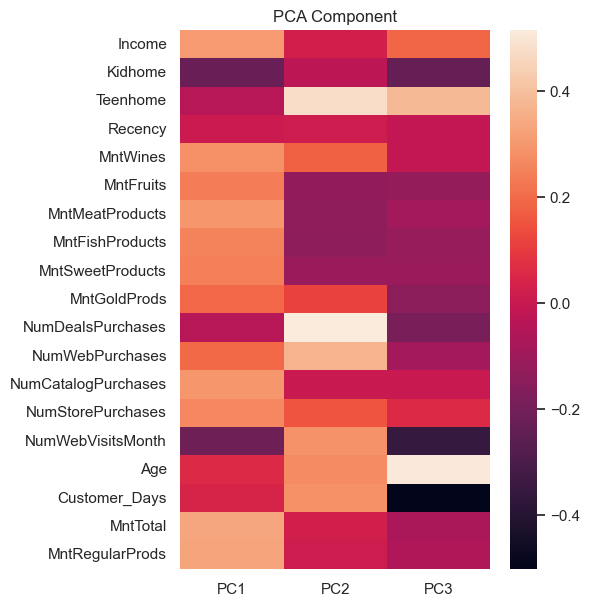

In [36]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = corr_cols,
                             columns = ['PC1','PC2','PC3']
                            )

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()


In [37]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2','PC3':'PCA3'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

          PCA1      PCA2      PCA3
0     4.589101  0.522189 -1.976742
1    -2.689258 -0.248487  1.948684
2     1.910203 -0.329359  0.345663
3    -2.893084 -1.513380 -0.481098
4    -0.412835 -0.364530 -0.788275
...        ...       ...       ...
2200  2.860210  1.365459 -0.450362
2201 -1.433052  2.699656  1.155381
2202  1.956871 -0.924147 -0.101246
2203  2.074938  0.527155  1.928449
2204 -2.040813  1.382763  0.217833

[2205 rows x 3 columns]


In [39]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=3)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
print(df_pca1)


           PC1       PC2       PC3
0     4.589101  0.522229  1.976676
1    -2.689258 -0.248483 -1.948745
2     1.910203 -0.329371 -0.345322
3    -2.893084 -1.513385  0.481223
4    -0.412835 -0.364511  0.787963
...        ...       ...       ...
2200  2.860210  1.365441  0.450180
2201 -1.433052  2.699660 -1.155540
2202  1.956871 -0.924180  0.102159
2203  2.074938  0.527155 -1.928114
2204 -2.040813  1.382761 -0.217958

[2205 rows x 3 columns]


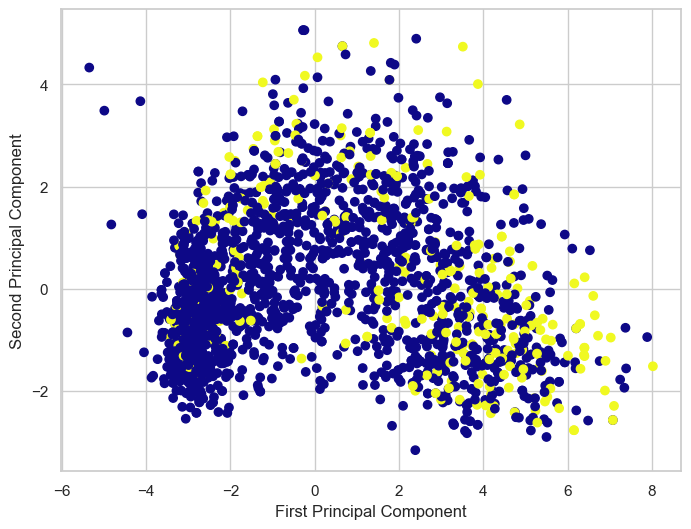

In [44]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c= Y.values.ravel(),
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


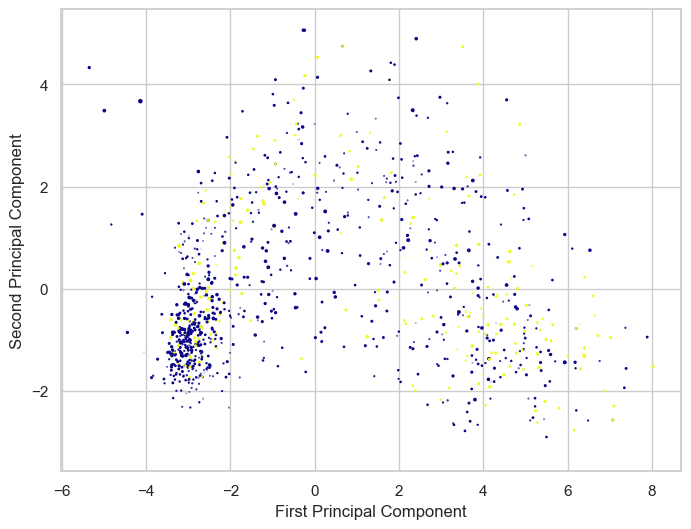

In [45]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],x_pca[:,2],
            c= Y.values.ravel(),
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [47]:
n_components = np.argmax(explained_var >= 0.70) + 1
n_components


5

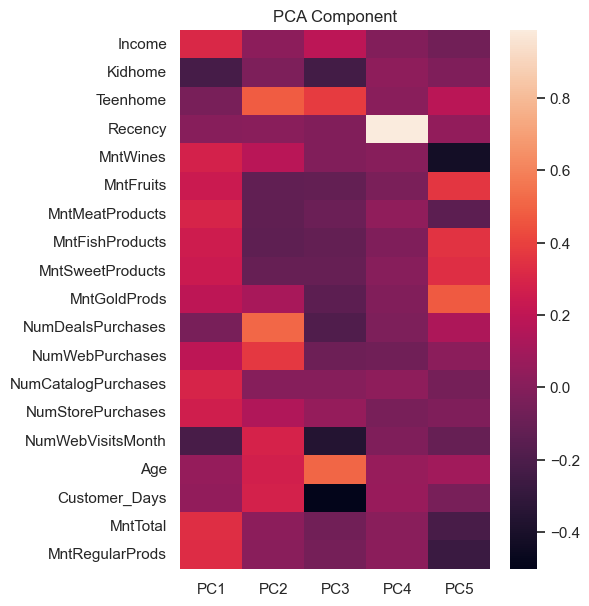

In [48]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = corr_cols,
                             columns = ['PC1','PC2','PC3','PC4','PC5']
                            )

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()


In [49]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2','PC3':'PCA3','PC4': 'PCA4','PC5':'PCA5'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

          PCA1      PCA2      PCA3      PCA4      PCA5
0     4.589101  0.522189 -1.976742  0.423032  0.565532
1    -2.689258 -0.248487  1.948684 -0.223499  0.248755
2     1.910203 -0.329359  0.345663 -1.005334  0.103969
3    -2.893084 -1.513380 -0.481098 -0.875984 -0.258499
4    -0.412835 -0.364530 -0.788275  1.338661  0.260501
...        ...       ...       ...       ...       ...
2200  2.860210  1.365459 -0.450362 -0.221690  2.070274
2201 -1.433052  2.699656  1.155381  0.189573 -0.354649
2202  1.956871 -0.924147 -0.101246  1.284022 -1.864604
2203  2.074938  0.527155  1.928449 -1.472993  0.342965
2204 -2.040813  1.382763  0.217833 -0.092955  0.027485

[2205 rows x 5 columns]


In [51]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=5)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
print(df_pca1)


           PC1       PC2       PC3       PC4       PC5
0     4.589101  0.522188  1.976749 -0.423076  0.565425
1    -2.689258 -0.248487 -1.948684  0.223491  0.248743
2     1.910203 -0.329359 -0.345670  1.005369  0.104056
3    -2.893084 -1.513380  0.481099  0.875992 -0.258487
4    -0.412835 -0.364530  0.788263 -1.338593  0.260674
...        ...       ...       ...       ...       ...
2200  2.860210  1.365461  0.450342  0.221855  2.070624
2201 -1.433052  2.699656 -1.155387 -0.189542 -0.354569
2202  1.956871 -0.924148  0.101264 -1.284148 -1.864888
2203  2.074938  0.527154 -1.928435  1.472904  0.342776
2204 -2.040813  1.382762 -0.217830  0.092908  0.027399

[2205 rows x 5 columns]


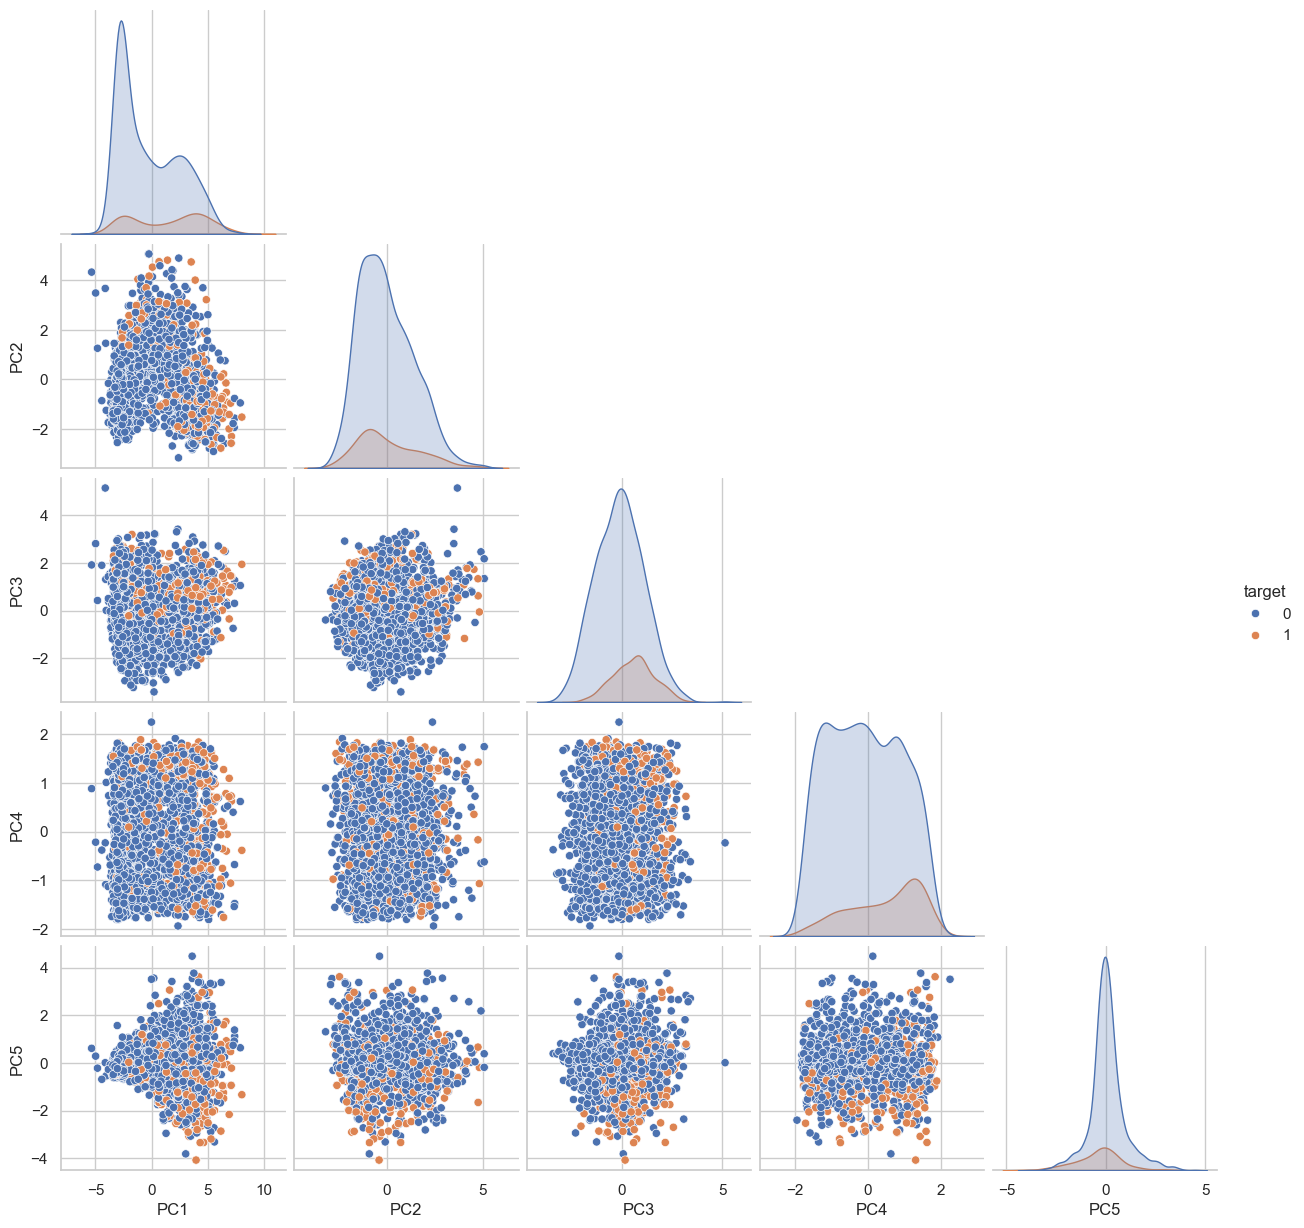

In [54]:
import seaborn as sns

# Create a DataFrame for the first 5 components (if you want to see them all)
pca_df = pd.DataFrame(x_pca[:, :5], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['target'] = Y.values.ravel()  # Add the target for color coding

sns.pairplot(pca_df, vars=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], hue='target', corner=True)
plt.show()


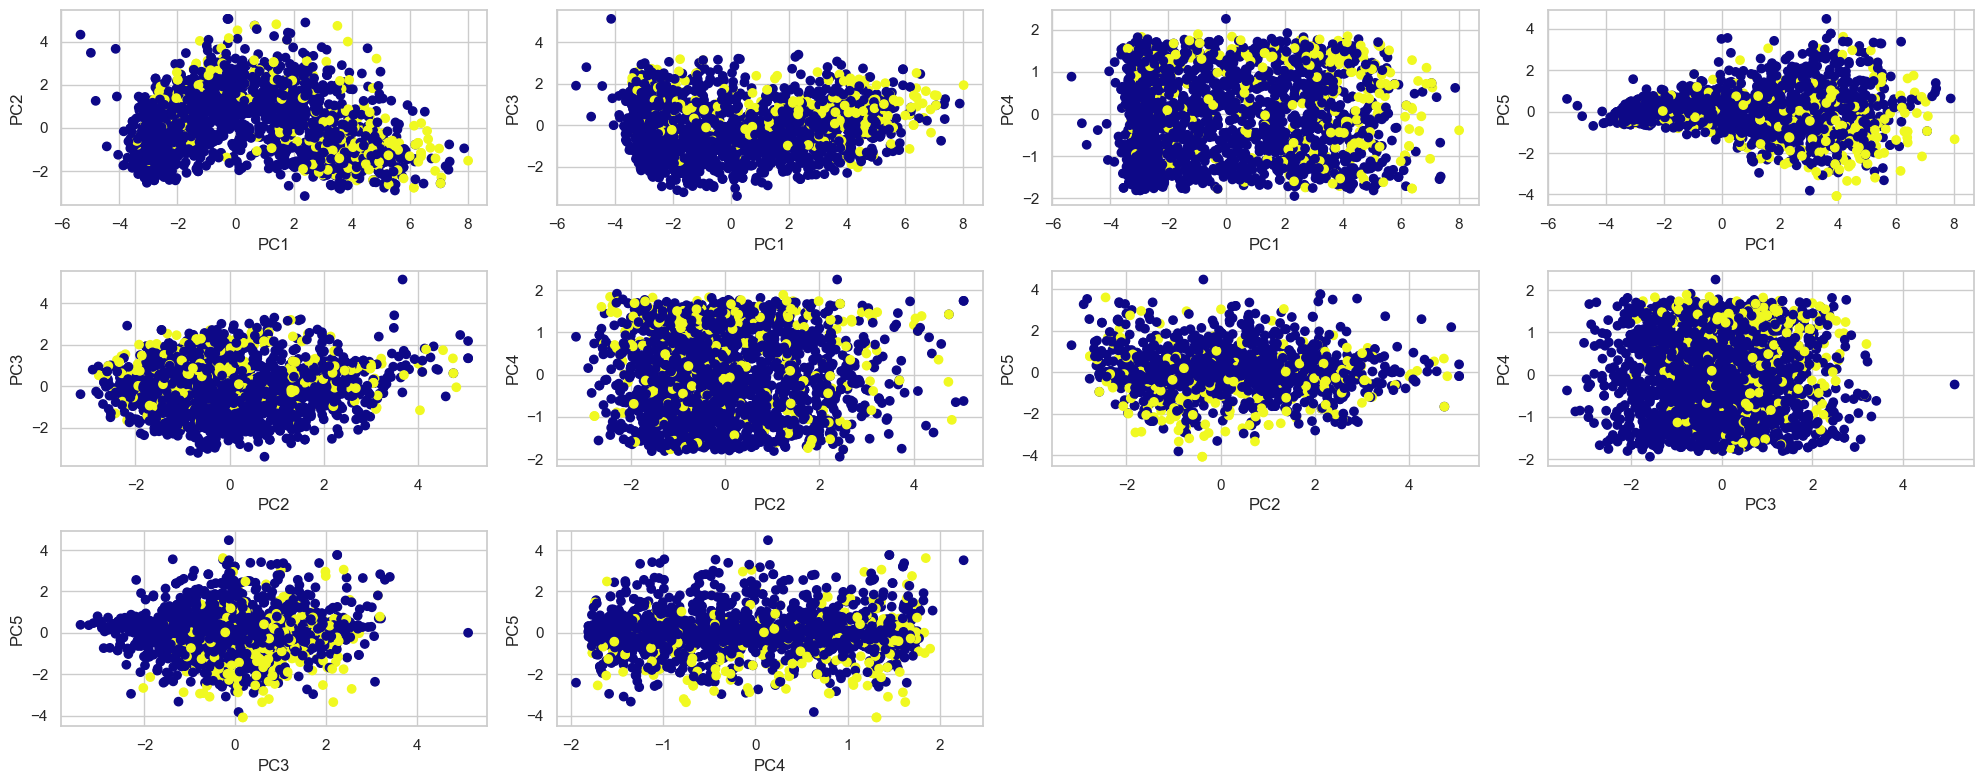

In [ ]:
import itertools
import matplotlib.pyplot as plt

# Generate all pairwise combinations of the 5 PCA components (indices 0 to 4)
combinations = list(itertools.combinations(range(5), 2))  # 10 pairs in total

# Set up the subplot grid:
n_rows, n_cols = 3, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8))

# Loop through each pair and corresponding subplot axis
for ax, (i, j) in zip(axes.flatten(), combinations):
    ax.scatter(x_pca[:, i], x_pca[:, j],
               c=Y.values.ravel(),  # flatten the target variable if needed
               cmap='plasma')
    ax.set_xlabel(f'PC{i+1}')
    ax.set_ylabel(f'PC{j+1}')

# Remove any unused subplots (if the grid is larger than needed)
for k in range(len(combinations), n_rows * n_cols):
    fig.delaxes(axes.flatten()[k])

plt.tight_layout()
plt.show()
